In [1]:
%pip install matplotlib
%pip install pandas

import gc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
input_parquet_file_path = '../data/interm/4.0_commune.parquet'

input_top_10_communes_file_path = '../data/interm/4.1_top_communes.csv'
input_bottom_10_communes_file_path = '../data/interm/4.1_bottom_communes.csv'

output_commune_evolution_file_path = '../data/interm/4.2_'

In [3]:
code_insee_identifier = 'Clean code INSEE'

top_communes_df = pd.read_csv(input_top_10_communes_file_path, dtype={'Clean code INSEE': str})
bottomm_commnes_df = pd.read_csv(input_bottom_10_communes_file_path, dtype={'Clean code INSEE': str})

data_df = pd.read_parquet(input_parquet_file_path)

Top Communes by Revenue: Evolution of Total Taxes


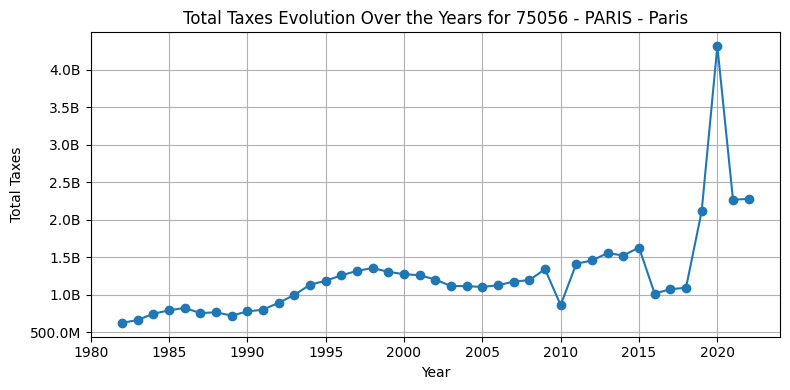

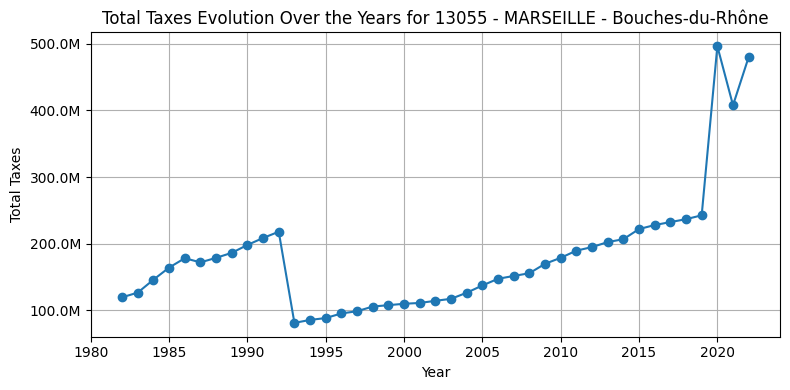

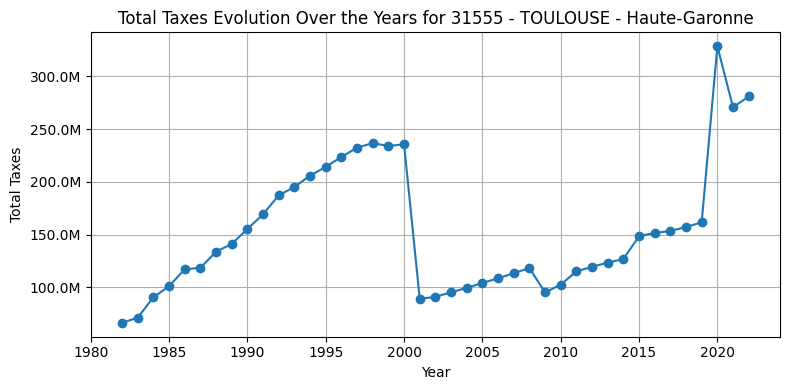

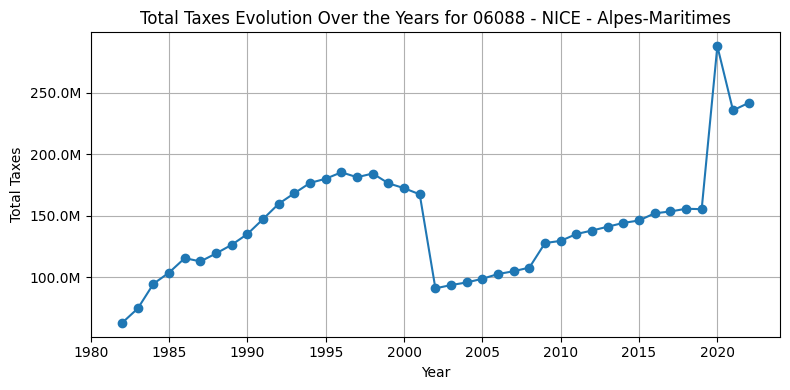

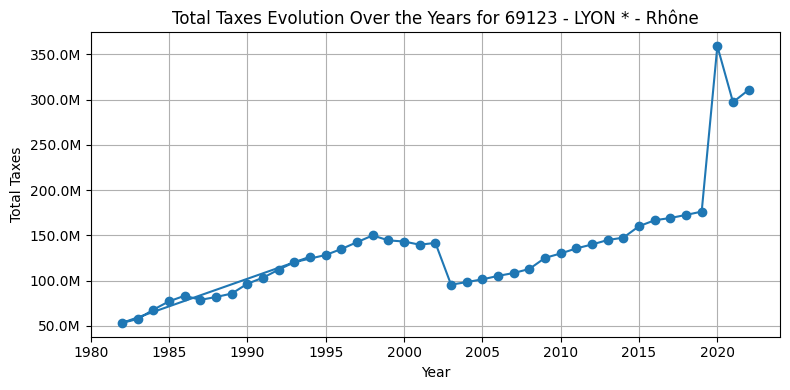

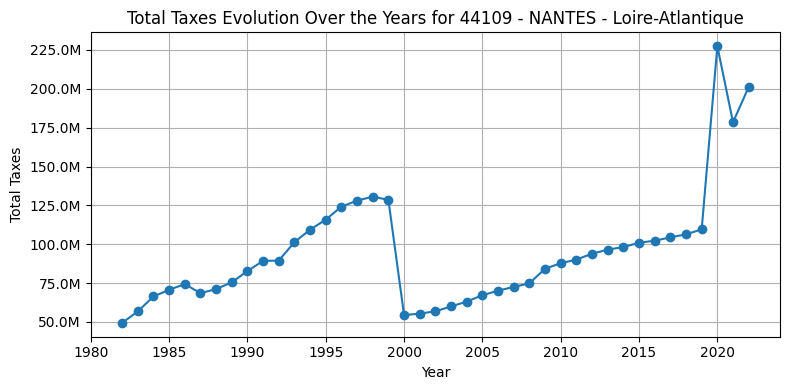

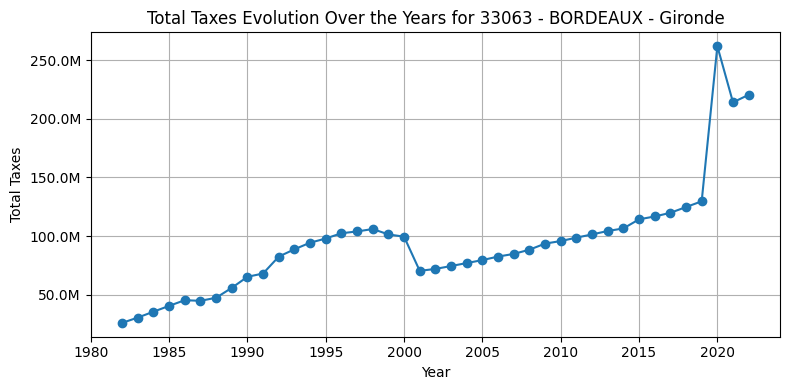

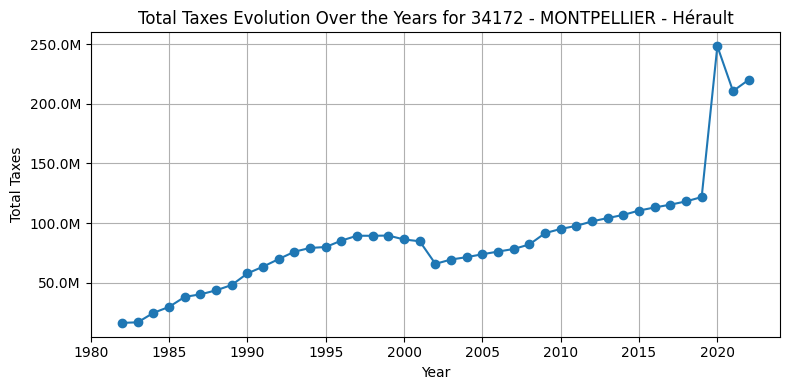

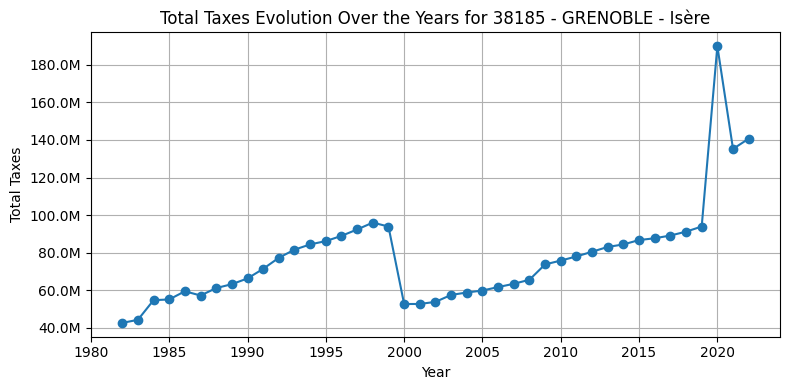

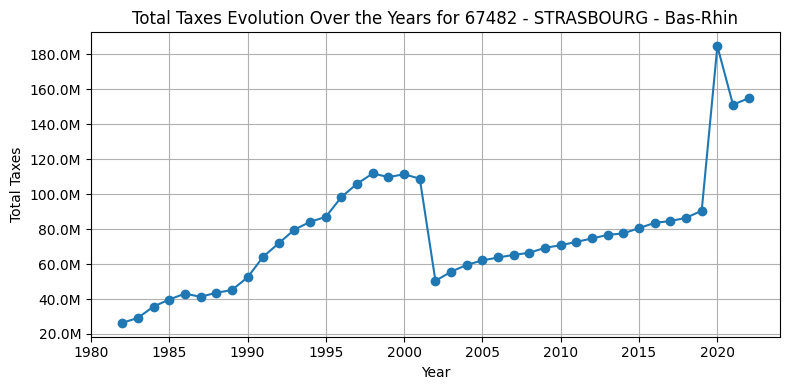

Bottom Communes by Revenue: Evolution of Total Taxes


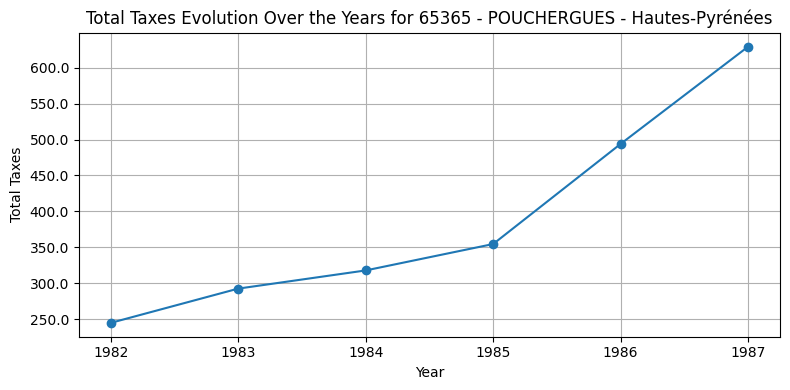

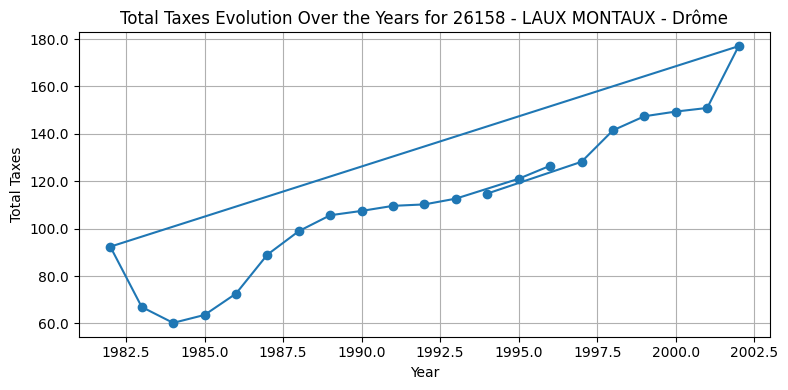

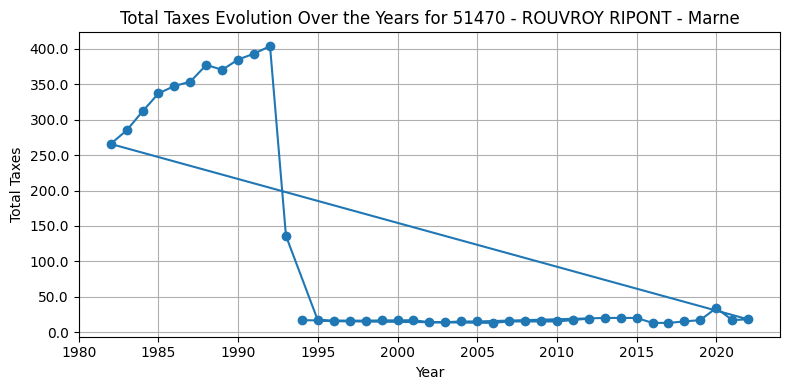

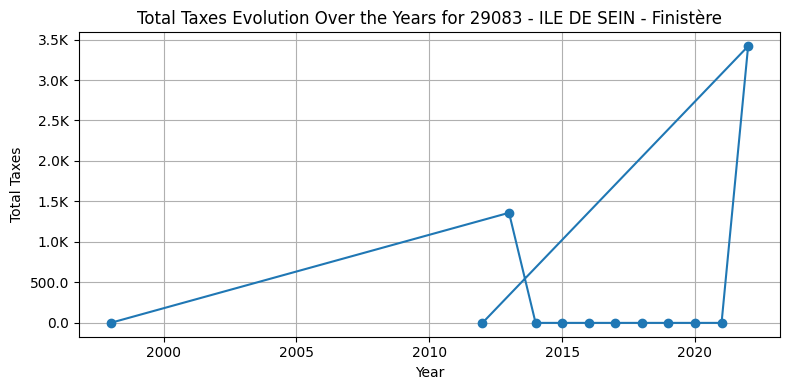

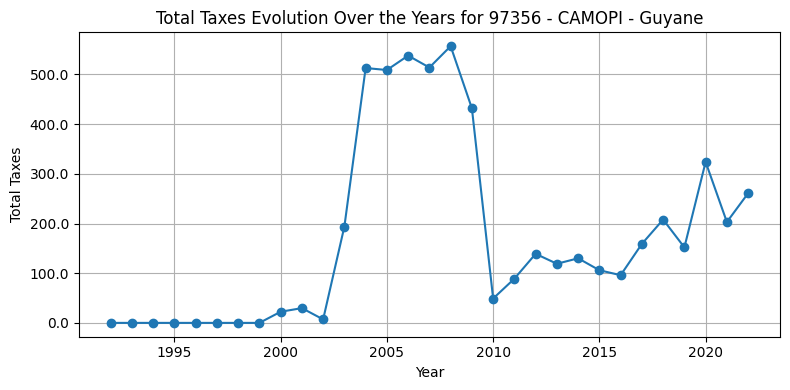

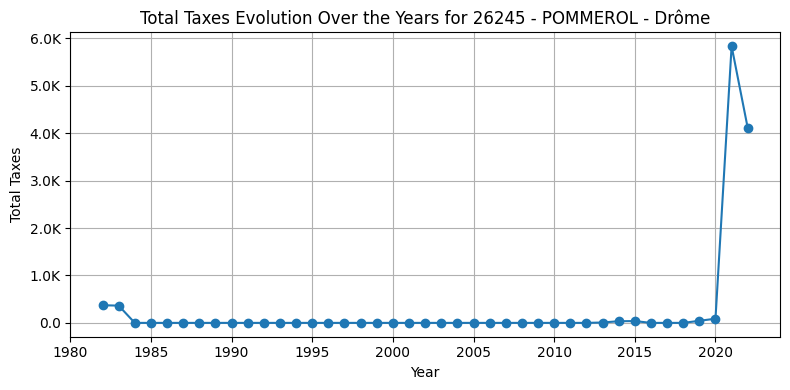

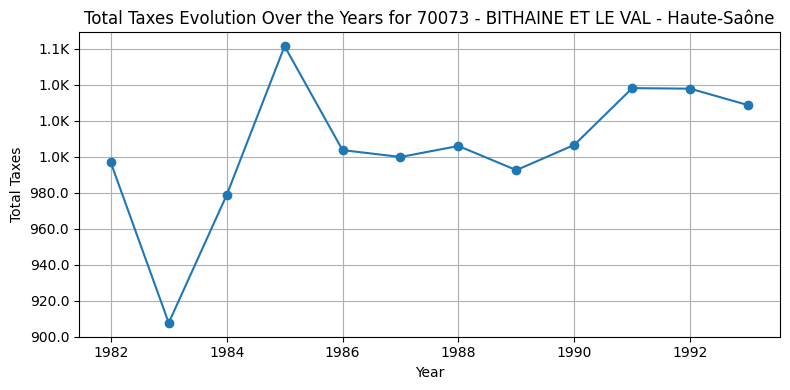

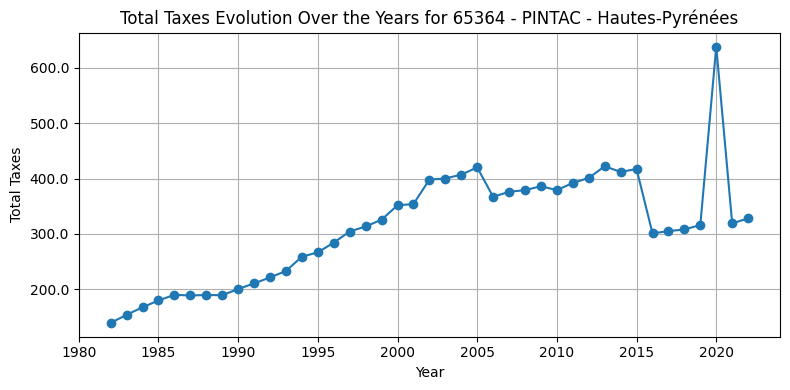

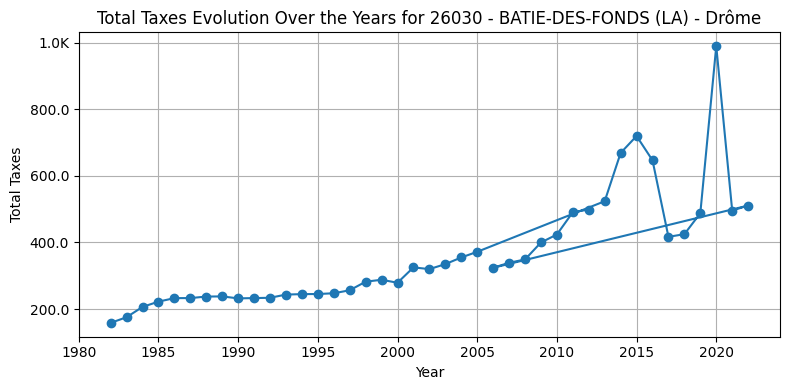

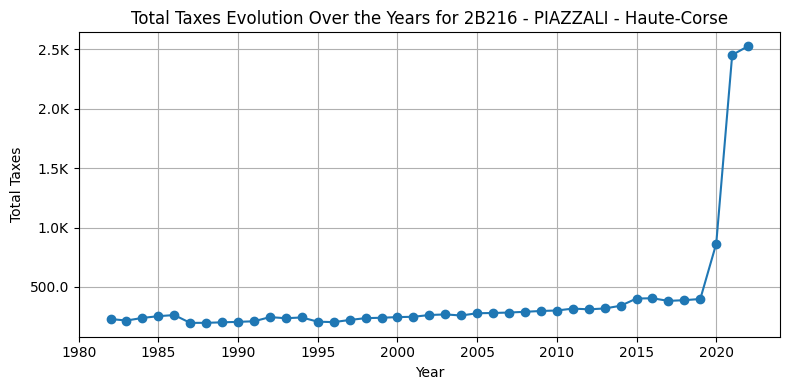

In [4]:
# Define a function to format the y-axis labels to display in millions
def human_readable_format(x, pos=None):
    """
    Converts a number into a human-readable format (K, M, B, T).
    
    Parameters:
    x (float): The number to be converted.
    pos (optional): The position (not used, but required for compatibility with matplotlib).

    Returns:
    str: The human-readable format of the number.
    """
    if x >= 1e12:
        return f'{x / 1e12:.1f}T'
    elif x >= 1e9:
        return f'{x / 1e9:.1f}B'
    elif x >= 1e6:
        return f'{x / 1e6:.1f}M'
    elif x >= 1e3:
        return f'{x / 1e3:.1f}K'
    else:
        return str(x)
    
def calculate_and_plot_taxes(insee_codes):
    tax_columns = data_df.columns[8:]

    # Filter data for specific INSEE codes
    df_filtered = data_df[data_df[code_insee_identifier].isin(insee_codes)]
    
    # Calculate the sum of all tax columns per 'Clean code INSEE' and 'ANNEE'
    total_taxes_per_year = df_filtered.groupby([code_insee_identifier, 'LABEL', 'ANNEE'])[tax_columns].sum().sum(axis=1).reset_index()
    total_taxes_per_year.rename(columns={0: 'Total Taxes'}, inplace=True)

    # Create a plot for each INSEE code
    for code in insee_codes:
        subset = total_taxes_per_year[total_taxes_per_year[code_insee_identifier] == code]
        if not subset.empty:  # This check ensures there's data to plot
            label_value = subset['LABEL'].iloc[0]

            fig, ax = plt.subplots(figsize=(8, 4))
            ax.plot(subset['ANNEE'], subset['Total Taxes'], marker='o', linestyle='-')
            ax.set_title(f'Total Taxes Evolution Over the Years for {label_value}')
            ax.set_xlabel('Year')
            ax.set_ylabel('Total Taxes')
            plt.gca().yaxis.set_major_formatter(FuncFormatter(human_readable_format))  # Apply the formatter
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        else:
            print(f"No data available to plot for INSEE code {code}")

print("Top Communes by Revenue: Evolution of Total Taxes")
calculate_and_plot_taxes(top_communes_df[code_insee_identifier].to_list())

print("Bottom Communes by Revenue: Evolution of Total Taxes")
calculate_and_plot_taxes(bottomm_commnes_df[code_insee_identifier].to_list())

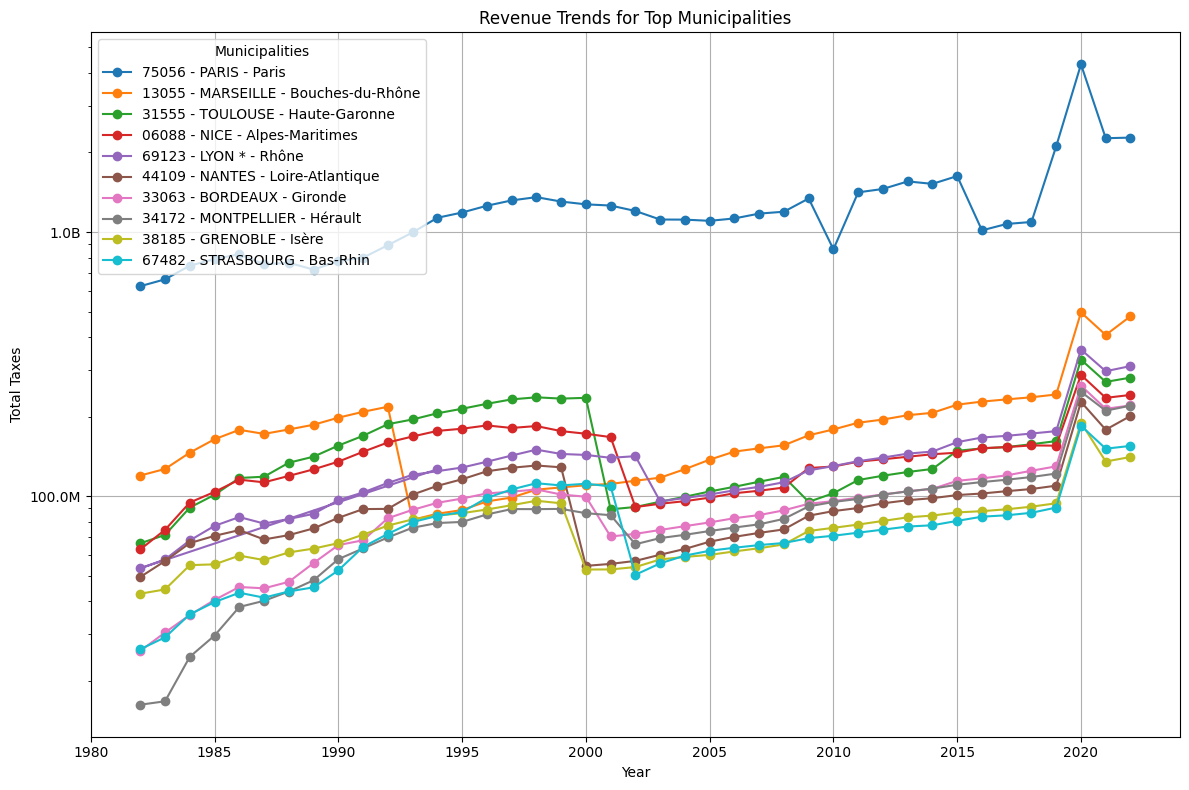

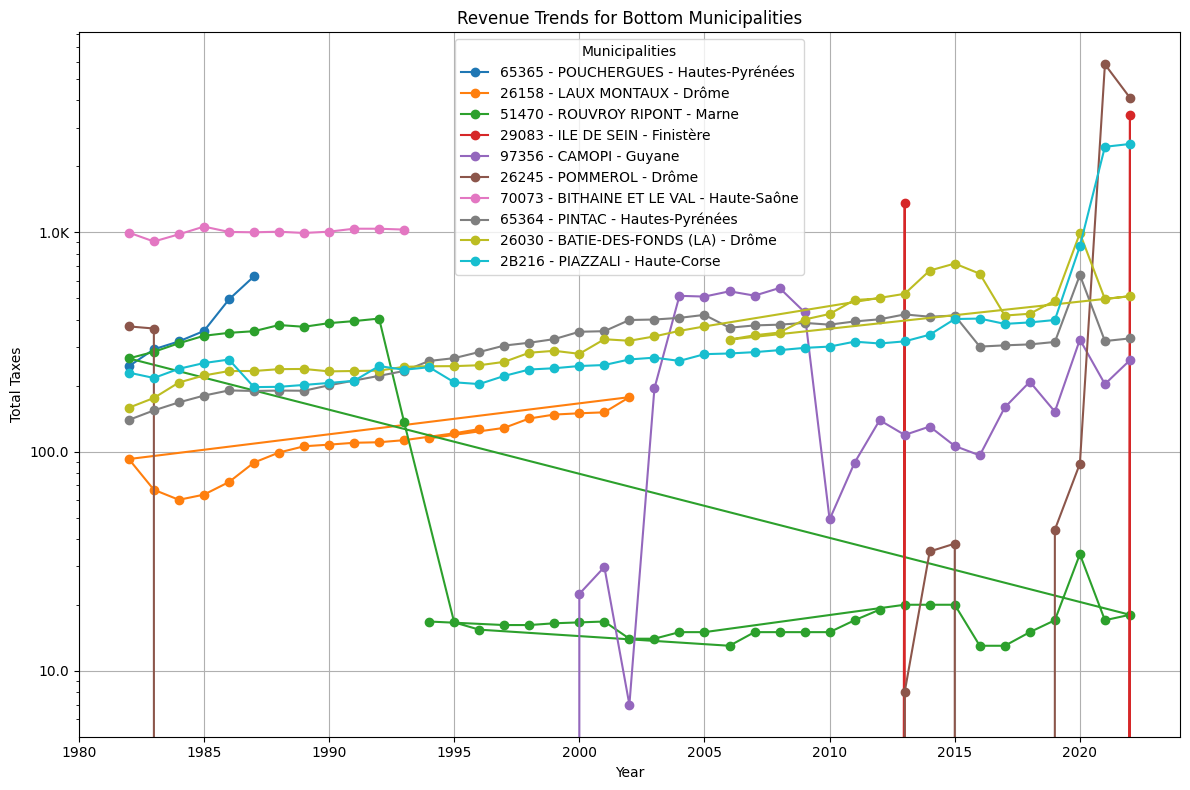

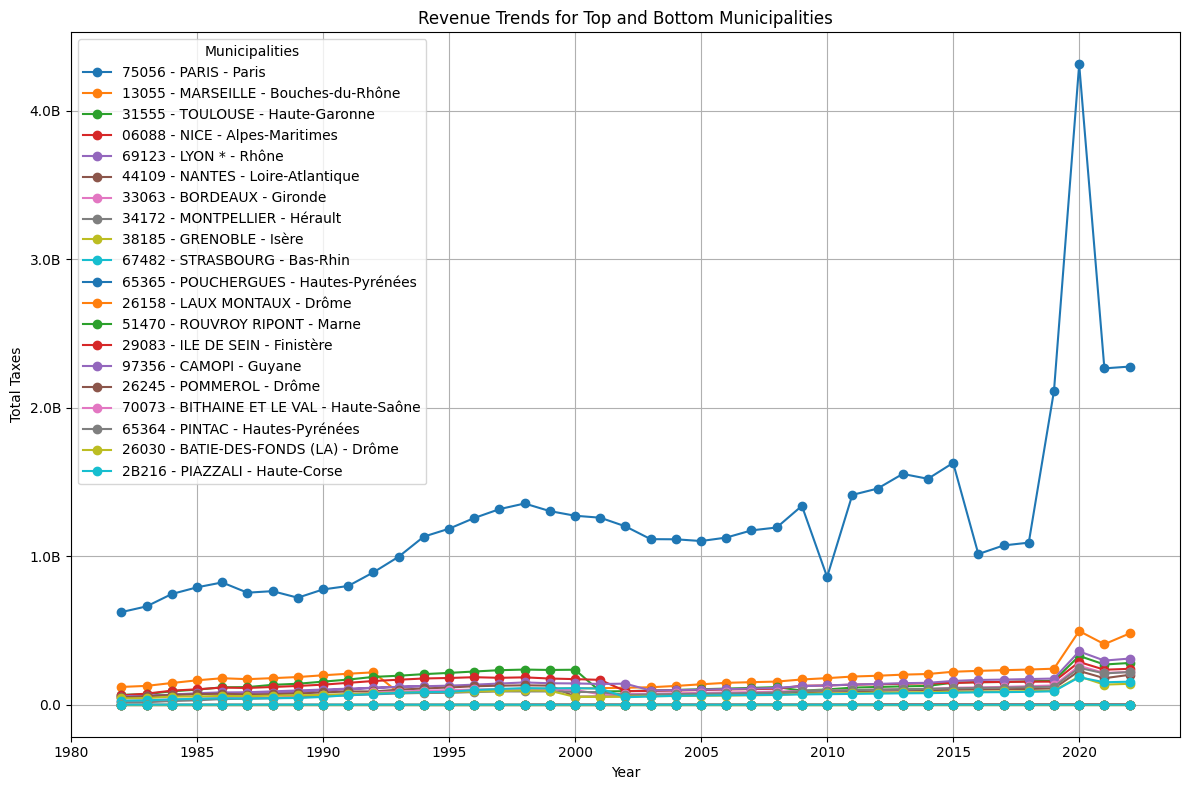

In [5]:
def calculate_and_plot_combined_taxes(insee_codes, message, scale):
    # Identify tax columns (starting typically from the 7th column)
    tax_columns = data_df.columns[8:]

    # Filter data for specific INSEE codes
    df_filtered = data_df[data_df[code_insee_identifier].isin(insee_codes)]
    
    # Calculate the sum of all tax columns per 'Clean code INSEE' and 'ANNEE'
    total_taxes_per_year = df_filtered.groupby([code_insee_identifier, 'LABEL', 'ANNEE'])[tax_columns].sum().sum(axis=1).reset_index()
    total_taxes_per_year.rename(columns={0: 'Total Taxes'}, inplace=True)

    # Plot all the selected municipalities in one graph
    plt.figure(figsize=(12, 8))

    for code in insee_codes:
        subset = total_taxes_per_year[total_taxes_per_year[code_insee_identifier] == code]
        if not subset.empty:  # This check ensures there's data to plot
            label_value = subset['LABEL'].iloc[0]
            plt.plot(subset['ANNEE'], subset['Total Taxes'], marker='o', linestyle='-', label=label_value)

    plt.title(message)
    plt.xlabel('Year')
    plt.ylabel('Total Taxes')
    plt.yscale(scale)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(human_readable_format))  # Apply the formatter
    plt.legend(title='Municipalities')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


calculate_and_plot_combined_taxes(top_communes_df[code_insee_identifier].to_list(), 'Revenue Trends for Top Municipalities', 'log')
calculate_and_plot_combined_taxes(bottomm_commnes_df[code_insee_identifier].to_list(), 'Revenue Trends for Bottom Municipalities', 'log')

# Combine top and bottom into one DataFrame
top_and_bottom_communes = pd.concat([top_communes_df, bottomm_commnes_df])

# Extract INSEE codes
top_and_bottom_communes = top_and_bottom_communes[code_insee_identifier].to_list()

# Plot the revenue trends for the top and bottom municipalities
calculate_and_plot_combined_taxes(top_and_bottom_communes, 'Revenue Trends for Top and Bottom Municipalities', 'linear')

In [6]:
del data_df

gc.collect()

45239